In [1]:
#Pridicting Power generation because on Wind

from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
import glob
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
%matplotlib inline


Using TensorFlow backend.


In [2]:
#Loading the dataset 
data_frame = pd.read_csv('C:/Users/gurun/Desktop/ProjectCPS/DPPdataset.csv',index_col="DATETIME")
data_frame.head()

,air temp degree,Air density,wind speed at 100m (m/s),wind direction at 100m (deg),Power (KW)
DATETIME,,,,,
1/1/2007 0:00,2.430,1.223,11.673,244.189,15701
1/1/2007 0:05,2.387,1.224,11.395,244.755,15498
1/1/2007 0:10,2.336,1.224,11.468,245.644,15568
1/1/2007 0:15,2.278,1.224,11.636,246.863,15691
1/1/2007 0:20,2.192,1.225,11.727,247.287,15719


In [3]:
#Cleaning the data set
data_frame['Power (KW)'].replace(0, np.nan, inplace=True)
data_frame['Power (KW)'].fillna(method='ffill', inplace=True)

In [4]:
#Dividing data set into a train-test split 60-40
data_set = data_frame.values
train_size = int(len(data_set) * 0.60)
test_size = len(data_set) - train_size
train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

In [5]:
print("The length of the splitted data set - Train set:", len(train))
print("The length of the splitted data set - Test set:", len(test))

The length of the splitted data set - Train set: 63072
The length of the splitted data set - Test set: 42048


In [6]:
#Helper to create time frames with look backs
def create_dataset(data_set, look_back=1):
    X_data, Y_data = [], []
    
    for i in range(len(data_set) - look_back):
        a = data_set[i:(i + look_back), 0]
        X_data.append(a)
        Y_data.append(data_set[i + look_back, 0])
    print(len(Y_data))
    
    return np.array(X_data), np.array(Y_data)

In [7]:
#Creating time frames with look backs and rehsaping the data for the requirement of the model
look_back = 8
XTrain, YTrain = create_dataset(train, look_back)
XTrain = np.reshape(XTrain, (XTrain.shape[0], 1, XTrain.shape[1]))
XTest, YTest = create_dataset(test, look_back)
XTest = np.reshape(XTest, (XTest.shape[0], 1, XTest.shape[1]))

63064
42040


In [8]:
print("The time frame was taken with the number of look backs = 8")
print("Rehsaping the data for the requirement of the model Train set:", len(XTrain))
print("Rehsaping the data for the requirement of the model Test set:", len(XTest))

The time frame was taken with the number of look backs = 8
Rehsaping the data for the requirement of the model Train set: 63064
Rehsaping the data for the requirement of the model Test set: 42040


In [9]:
#Fitting the data in LSTM Deep Learning model
model = Sequential()
model.add(LSTM(100, input_shape=(XTrain.shape[1], XTrain.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(XTrain, YTrain, epochs=300, batch_size=100, validation_data=(XTest, YTest), verbose=0, shuffle=False)

In [10]:
#Predicting test split of 40% of the 1 year data
Y_pred = model.predict(XTest)

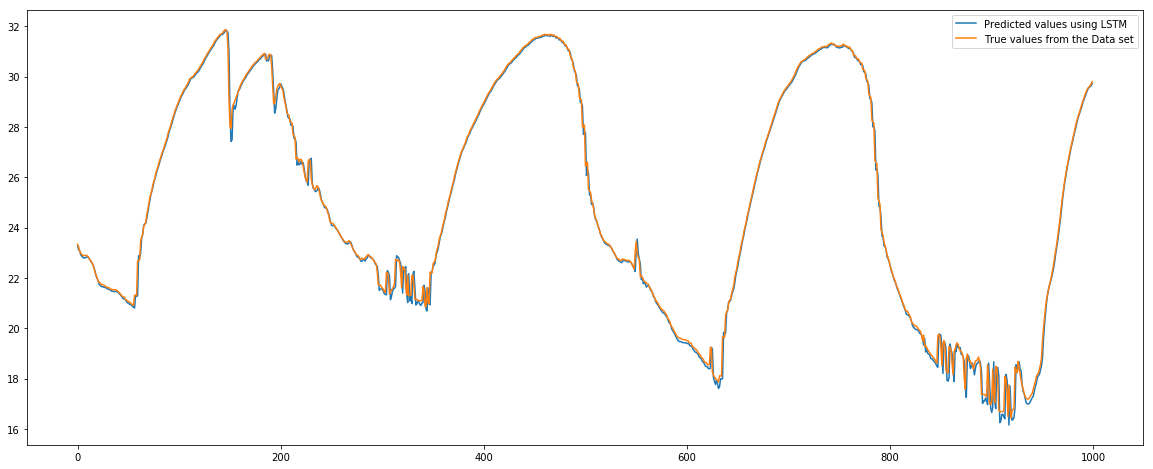

In [11]:
#Plotting the first 1000 entries to see prediction
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.plot(Y_pred[:1000], label= 'Predicted values using LSTM')
pyplot.plot(YTest[:1000], label= 'True values from the Data set')
pyplot.legend()

In [12]:
from sklearn.metrics import r2_score
print('Variance : %.3f' % r2_score(YTest, Y_pred))

Variance : 1.000


In [13]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.3f" % mean_squared_error(YTest, Y_pred))
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(YTest, Y_pred)))

Mean squared error: 0.056
Root mean squared error: 0.236
